In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# df_neas = pd.read_csv('_df_neas_with_lags_model_input.csv') # df_neas_with_lags_model_input_nekt.csv
# df_seas = pd.read_csv('_df_seas_with_lags_model_input.csv') # df_seas_with_lags_model_input_nekt.csv

# df_neas = pd.read_csv('df_neas_with_lags_model_input_nekt_first_try.csv') # df_neas_with_lags_model_input_nekt.csv
# df_seas = pd.read_csv('df_seas_with_lags_model_input_nekt_first_try.csv') # df_seas_with_lags_model_input_nekt.csv

df_neas = pd.read_csv('df_neas_with_lags_model_input_nekt.csv') # df_neas_with_lags_model_input_nekt.csv
df_seas = pd.read_csv('df_seas_with_lags_model_input_nekt.csv') # df_seas_with_lags_model_input_nekt.csv


In [3]:
# 'cruise_no',
#  'cruise_id',
#  'date',

In [4]:
df_neas.head(3)

,Unnamed: 0,ssch,ssch5ctd,ichs,inscm,inscmd,inz,scmdctd,scmch,pscm,...,dsld_lag3,dsld_lag4,dsldo_lag1,dsldo_lag2,dsldo_lag3,dsldo_lag4,dslt_lag1,dslt_lag2,dslt_lag3,dslt_lag4
0,0,0.601891,0.075800,0.127111,0.385882,57.647059,440.811671,25.000000,1.817665,12.711000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.445522,0.362374,0.120000,0.385882,57.647059,184.284000,41.457627,1.265956,12.609468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0.692553,0.792200,0.205278,0.900000,40.000000,0.180000,22.000000,1.480000,14.220000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# list(df_neas.columns)
# df_neas.columns

In [6]:
print(df_neas.shape)

(43, 134)


In [7]:
print(df_neas.shape)

(43, 134)


In [8]:
df_neas = df_neas.drop(columns='Unnamed: 0', errors='ignore')
df_seas = df_seas.drop(columns='Unnamed: 0', errors='ignore')
# df_neas = df_neas.drop(columns=['cruise_no', 'cruise_id', 'date'])
# df_seas = df_seas.drop(columns=['cruise_no', 'cruise_id', 'date'])
                       
# Drop columns that contain '_lag' in their name
df_neas = df_neas.loc[:, ~df_neas.columns.str.contains('_lag')]
df_seas = df_seas.loc[:, ~df_seas.columns.str.contains('_lag')]

In [9]:

pd.set_option('display.max_columns', None)  # Show all columns when printing a DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to multiple lines


In [10]:
print(df_neas.shape)
print(df_seas.shape)


(43, 33)
(44, 33)


In [11]:
df_neas.head(3)

,ssch,ssch5ctd,ichs,inscm,inscmd,inz,scmdctd,scmch,pscm,scmden,sp,sss,sst,sden,sdo,mld,oxy,omzt,omzb,bt_15,bt_20,std,dsld,dsldo,dslt,d/n,nektc_ton,nekt_cwa_ton,cwafe,nektb_ton,cruise_no,cruise_id,date
0,0.601891,0.075800,0.127111,0.385882,57.647059,440.811671,25.000000,1.817665,12.711000,23.610000,187.950000,35.76,27.17,23.24,4.3,23.00,99,149.0,997.000000,266.0,149.0,3372.0,327.0,0.0100,100.0,1,0.003150,0.046063,0.046063,4.606324,313,313,2013-02-17
1,0.445522,0.362374,0.120000,0.385882,57.647059,184.284000,41.457627,1.265956,12.609468,23.390678,171.742461,29.75,36.38,29.75,4.1,22.00,89,123.0,561.916667,244.0,136.0,2787.0,380.0,0.1623,132.0,0,0.000184,0.027423,0.054846,3.619818,406,406,2024-08-05
2,0.692553,0.792200,0.205278,0.900000,40.000000,0.180000,22.000000,1.480000,14.220000,24.430000,57.170000,36.69,25.86,24.35,4.0,55.75,89,153.0,561.916667,342.0,158.0,2892.0,110.0,1.2700,120.0,1,0.021886,0.142550,0.155760,22.138010,347(II),347(II),2016-08-02


In [12]:
df_seas.head(3)

,ssch,ssch5ctd,ichs,inscm,inscmd,inz,scmdctd,scmch,pscm,scmden,sp,sss,sst,sden,sdo,mld,oxy,omzt,omzb,bt_15,bt_20,std,dsld,dsldo,dslt,d/n,nektc_ton,nekt_cwa_ton,cwafe,nektb_ton,cruise_no,cruise_id,date
0,0.282003,1.1899,0.127111,0.385882,57.647059,440.811671,20.000000,1.817665,2.221700e+01,22.60,2.263300e+02,34.71,29.00,21.85,4.370,22.00,20,148.28125,561.916667,85.0,179.0,325.0,99.0,0.548,130.0,0,0.001000,0.000706,0.000353,0.056518,320,320,2013-06-10
1,0.178500,0.0068,0.070000,0.300000,40.000000,0.186046,35.000000,0.346441,2.886867e+01,22.83,1.771500e+02,35.71,29.40,22.46,4.725,24.00,48,148.28125,561.916667,70.0,157.0,1893.0,330.0,0.610,197.0,0,0.008014,0.015962,0.011737,8.282648,344(I),344(I),2015-07-09
2,0.114156,0.0195,0.127111,0.385882,57.647059,440.811671,56.322034,0.910000,1.000000e-12,23.27,1.000000e-12,35.75,29.12,22.59,4.200,55.75,76,148.28125,561.916667,180.0,109.0,2188.0,300.0,0.657,41.0,1,0.000084,0.060566,0.068577,10.206022,342,342,2015-07-28


In [13]:
print(list(df_neas.columns))


['ssch', 'ssch5ctd', 'ichs', 'inscm', 'inscmd', 'inz', 'scmdctd', 'scmch', 'pscm', 'scmden', 'sp', 'sss', 'sst', 'sden', 'sdo', 'mld', 'oxy', 'omzt', 'omzb', 'bt_15', 'bt_20', 'std', 'dsld', 'dsldo', 'dslt', 'd/n', 'nektc_ton', 'nekt_cwa_ton', 'cwafe', 'nektb_ton', 'cruise_no', 'cruise_id', 'date']


In [14]:
print(list(df_seas.columns))


['ssch', 'ssch5ctd', 'ichs', 'inscm', 'inscmd', 'inz', 'scmdctd', 'scmch', 'pscm', 'scmden', 'sp', 'sss', 'sst', 'sden', 'sdo', 'mld', 'oxy', 'omzt', 'omzb', 'bt_15', 'bt_20', 'std', 'dsld', 'dsldo', 'dslt', 'd/n', 'nektc_ton', 'nekt_cwa_ton', 'cwafe', 'nektb_ton', 'cruise_no', 'cruise_id', 'date']


#  Physics-Informed & Cross-Derived Features

In [15]:

def add_physics_informed_features(df):
    """
    Adds physics-informed and cross-feature engineered variables to a cruise-based oceanographic DataFrame.
    Handles division-by-zero safely with a small epsilon.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame with required raw columns
    
    Returns:
        df (pd.DataFrame): DataFrame with new derived features added
    """

    # Avoid division by zero
    eps = 0.1
    
    # 1. Vertical gradients
    df['chl_grad_surf_sub'] = df['ichs'] - df['inscm']
    df['chl_depth_ratio'] = df['inscm'] / (df['inscmd'] + eps)
    df['do_gradient'] = df['sdo'] - df['dsldo']
    df['density_strat'] = df['scmden'] - df['sden']
    
    # 2. Mixed layer & OMZ structure
    df['omz_thickness'] = df['omzb'] - df['omzt']
    df['mld_oxycline_diff'] = df['mld'] - df['oxy']
    df['mld_vs_scm_depth'] = df['mld'] - df['scmdctd']
    ## df['mld_ratio'] = df['mld'] / (df['std'] + eps)
    df['mld_ratio'] = df['mld'] / (df['dsld'] + eps) # new client reccomended instead of mld/std
    
    # 3. Thermocline structure
    df['thermo_span_15_20'] = df['bt_20'] - df['bt_15']
    df['temp_par_ratio'] = df['sst'] / (df['sp'] + eps)
    
    # 4. Fisheries-based features
    ## df['catch_per_effort'] = df['nektc_ton'] / (df['fe'] + eps)
    # df['biomass_to_catch'] = df['nektb_ton'] / (df['nektc_ton'] + eps) # target-derived feature
    # df['depth_adjusted_catch'] = df['nektc_ton'] / (df['std'] + eps) # target-derived feature
    ## df['chl_x_fe'] = df['ichs'] * df['fe']
    df['chl_x_oxy'] = df['ichs'] * df['sdo']
    
    # 5. Light & productivity proxies
    df['scm_par_ratio'] = df['pscm'] / (df['scmch'] + eps)
    df['surf_chl_ratio'] = df['ssch'] / (df['sst'] + eps)
    df['scm_chl_density'] = df['scmch'] / (df['scmden'] + eps)

    return df

df_neas = add_physics_informed_features(df_neas)
df_seas = add_physics_informed_features(df_seas)


In [16]:
print(list(df_neas.columns))


['ssch', 'ssch5ctd', 'ichs', 'inscm', 'inscmd', 'inz', 'scmdctd', 'scmch', 'pscm', 'scmden', 'sp', 'sss', 'sst', 'sden', 'sdo', 'mld', 'oxy', 'omzt', 'omzb', 'bt_15', 'bt_20', 'std', 'dsld', 'dsldo', 'dslt', 'd/n', 'nektc_ton', 'nekt_cwa_ton', 'cwafe', 'nektb_ton', 'cruise_no', 'cruise_id', 'date', 'chl_grad_surf_sub', 'chl_depth_ratio', 'do_gradient', 'density_strat', 'omz_thickness', 'mld_oxycline_diff', 'mld_vs_scm_depth', 'mld_ratio', 'thermo_span_15_20', 'temp_par_ratio', 'chl_x_oxy', 'scm_par_ratio', 'surf_chl_ratio', 'scm_chl_density']


In [17]:
print(list(df_seas.columns))


['ssch', 'ssch5ctd', 'ichs', 'inscm', 'inscmd', 'inz', 'scmdctd', 'scmch', 'pscm', 'scmden', 'sp', 'sss', 'sst', 'sden', 'sdo', 'mld', 'oxy', 'omzt', 'omzb', 'bt_15', 'bt_20', 'std', 'dsld', 'dsldo', 'dslt', 'd/n', 'nektc_ton', 'nekt_cwa_ton', 'cwafe', 'nektb_ton', 'cruise_no', 'cruise_id', 'date', 'chl_grad_surf_sub', 'chl_depth_ratio', 'do_gradient', 'density_strat', 'omz_thickness', 'mld_oxycline_diff', 'mld_vs_scm_depth', 'mld_ratio', 'thermo_span_15_20', 'temp_par_ratio', 'chl_x_oxy', 'scm_par_ratio', 'surf_chl_ratio', 'scm_chl_density']


# XGBRegressor

# XGBRegressor - hyperparameter tuning

In [18]:
# !pip install graphviz

In [19]:
# # from sklearn.model_selection import KFold, RandomizedSearchCV
# from sklearn.model_selection import KFold, cross_validate, RandomizedSearchCV
# from sklearn.metrics import make_scorer
# from xgboost import XGBRegressor
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np
# import pandas as pd

# def nse_score(y_true, y_pred):
#     return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

# def select_correlated_features(df, target, threshold=0.15):
#     base_features = [col for col in df.columns if "_lag" not in col and col != target and df[col].dtype in [np.float64, np.int64]]
#     lag_features = [col for col in df.columns if "_lag" in col]

#     corr = df[base_features + [target]].corr()[target].drop(target)
#     selected_base = corr[abs(corr) > threshold].index.tolist()
#     selected_lags = [col for col in lag_features if any(base in col for base in selected_base)]

#     return selected_base + selected_lags


# def tune_xgboost_model(df, target, exclude_cols=None, target_cols=None, area='?', n_iter=25, 
#                        random_state=42, impute=True, verbose=True, n_splits=5):
#     print(f"------------------- Predicting {target} -------------------")

#     if exclude_cols is None:
#         exclude_cols = []
#     else:
#         exclude_cols = list(exclude_cols)

#     if target_cols is not None:
#         exclude_cols += [col for col in target_cols if col != target]
#         exclude_cols = list(set(exclude_cols))

#     print(f'Excluded Features for model prediction for target = {target} : ', exclude_cols)
#     print(" ")

#     df_model = df.dropna(subset=[target]).copy()
#     features = select_correlated_features(df_model, target, threshold=0.2)
#     print(f'Included Features for model prediction for target = {target}: ', features)
#     print(" ")

#     X = df_model[features]
#     y = df_model[target]

#     if impute:
#         imputer = SimpleImputer(strategy='mean')
#         X = pd.DataFrame(imputer.fit_transform(X), columns=features, index=X.index)

#     param_grid = {
#         'max_depth': [1, 2, 3, 4, 5],
#         'learning_rate': [0.001, 0.01, 0.05, 0.1],
#         'n_estimators': [50, 100, 150],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.5, 0.7, 1.0],
#         'reg_alpha': [0, 0.1, 0.5],
#         'reg_lambda': [1, 3, 5]
#     }

#     rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

#     search = RandomizedSearchCV(
#         XGBRegressor(random_state=random_state),
#         param_distributions=param_grid,
#         n_iter=n_iter,
#         scoring=rmse_scorer,
#         cv=KFold(n_splits=n_splits, shuffle=True, random_state=random_state),
#         verbose=0,
#         random_state=random_state,
#         n_jobs=-1
#     )  

#     search.fit(X, y)

    

#     best_model = search.best_estimator_
#     best_params = search.best_params_

#     from sklearn.model_selection import train_test_split

#     # Split for reporting train/test accuracy post CV tuning
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    
#     y_train_pred = best_model.predict(X_train)
#     y_test_pred = best_model.predict(X_test)
    
#     train_rmse = mean_squared_error(y_train, y_train_pred)
#     test_rmse = mean_squared_error(y_test, y_test_pred)
#     train_r2 = r2_score(y_train, y_train_pred)
#     test_r2 = r2_score(y_test, y_test_pred)
#     train_nse = nse_score(y_train, y_train_pred)
#     test_nse = nse_score(y_test, y_test_pred)
    

#     metrics_df = pd.DataFrame([{
#     "area": area,
#     "target": target,
#     "train_rmse": round(train_rmse, 3),
#     "test_rmse": round(test_rmse, 3),
#     "train_r2": round(train_r2, 3),
#     "test_r2": round(test_r2, 3),
#     "train_nse": round(train_nse, 3),
#     "test_nse": round(test_nse, 3),
#     "status": "Overfitting" if train_r2 - test_r2 > 0.3 else "Underfitting" if train_r2 < 0.3 and test_r2 < 0.3 else "Good"
# }])


#     # best_model = search.best_estimator_
#     # best_params = search.best_params_
    
    
#     # cv_results = cross_validate(
#     #     estimator=best_model,
#     #     X=X,
#     #     y=y,
#     #     cv=KFold(n_splits=n_splits, shuffle=True, random_state=random_state),
#     #     scoring={
#     #         'r2': 'r2',
#     #         'rmse': 'neg_root_mean_squared_error'
#     #     },
#     #     return_train_score=True
#     # )
    
#     # # Extract and average fold results
#     # train_r2 = np.mean(cv_results['train_r2'])
#     # test_r2 = np.mean(cv_results['test_r2'])
#     # train_rmse = -np.mean(cv_results['train_rmse'])  # Scikit-learn uses neg RMSE
#     # test_rmse = -np.mean(cv_results['test_rmse'])
    
#     # # NSE is equivalent to R² for comparison with mean of y
#     # train_nse = train_r2
#     # test_nse = test_r2
    
#     # metrics_df = pd.DataFrame([{
#     #     "area": area,
#     #     "target": target,
#     #     "train_rmse": round(train_rmse, 3),
#     #     "test_rmse": round(test_rmse, 3),
#     #     "train_r2": round(train_r2, 3),
#     #     "test_r2": round(test_r2, 3),
#     #     "train_nse": round(train_nse, 3),
#     #     "test_nse": round(test_nse, 3),
#     #     "status": "Overfitting" if train_r2 - test_r2 > 0.3 else "Underfitting" if train_r2 < 0.3 and test_r2 < 0.3 else "Good"
#     # }])



#     if verbose:
#         print(metrics_df.to_string(index=False))
#         print(f"\nBest hyperparameters for {target} | {area} : \n{best_params}")
#         print(" ")
#         print(f"Highly correlated Features : \n{features}")
#         print(" ")

#     importances = best_model.feature_importances_
#     importance_feature = pd.DataFrame({
#         'feature': features,
#         'importance': importances
#     }).sort_values(by='importance', ascending=False)

#     if verbose:
#         print("\nTop 10 Feature Importances:")
#         print(importance_feature.head(10).to_string(index=False))

#     return best_model, metrics_df, best_params, features, importance_feature


In [20]:

# from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate, RandomizedSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

def nse_score(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

def select_correlated_features(df, target, threshold=0.15):
    base_features = [col for col in df.columns if "_lag" not in col and col != target and df[col].dtype in [np.float64, np.int64]]
    lag_features = [col for col in df.columns if "_lag" in col]

    corr = df[base_features + [target]].corr()[target].drop(target)
    selected_base = corr[abs(corr) > threshold].index.tolist()
    selected_lags = [col for col in lag_features if any(base in col for base in selected_base)]

    return selected_base + selected_lags


# def tune_xgboost_model(df, target, exclude_cols=None, target_cols=None, area='?', n_iter=25, 
#                        random_state=42, impute=True, verbose=True, n_splits=5):
#     print(f"------------------- Predicting {target} -------------------")

#     if exclude_cols is None:
#         exclude_cols = []
#     else:
#         exclude_cols = list(exclude_cols)

#     if target_cols is not None:
#         exclude_cols += [col for col in target_cols if col != target]
#         exclude_cols = list(set(exclude_cols))

#     print(f'Excluded Features for model prediction for target = {target} : ', exclude_cols)
#     print(" ")

#     df_model = df.dropna(subset=[target]).copy()
#     features = select_correlated_features(df_model, target, threshold=0.2)
#     print(f'Included Features for model prediction for target = {target}: ', features)
#     print(" ")

#     X = df_model[features]
#     y = df_model[target]

#     if impute:
#         imputer = SimpleImputer(strategy='mean')
#         X = pd.DataFrame(imputer.fit_transform(X), columns=features, index=X.index)

#     # ===  Split before CV to ensure independent evaluation === #
#     from sklearn.model_selection import train_test_split
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

#     param_grid = {
#         'max_depth': [1, 2, 3, 4, 5],
#         'learning_rate': [0.001, 0.01, 0.05, 0.1],
#         'n_estimators': [50, 100, 150],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.5, 0.7, 1.0],
#         'reg_alpha': [0, 0.1, 0.5],
#         'reg_lambda': [1, 3, 5]
#     }

#     rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

#     search = RandomizedSearchCV(
#         XGBRegressor(random_state=random_state),
#         param_distributions=param_grid,
#         n_iter=n_iter,
#         scoring=rmse_scorer,
#         cv=KFold(n_splits=n_splits, shuffle=True, random_state=random_state),
#         verbose=0,
#         random_state=random_state,
#         n_jobs=-1
#     )  

#     #  Fit only on training data
#     search.fit(X_train, y_train)
#     best_model = search.best_estimator_
#     best_params = search.best_params_

#     #  Final evaluation on untouched test set
#     y_train_pred = best_model.predict(X_train)
#     y_test_pred = best_model.predict(X_test)

#     train_rmse = mean_squared_error(y_train, y_train_pred)
#     test_rmse = mean_squared_error(y_test, y_test_pred)
#     train_r2 = r2_score(y_train, y_train_pred)
#     test_r2 = r2_score(y_test, y_test_pred)
#     train_nse = nse_score(y_train, y_train_pred)
#     test_nse = nse_score(y_test, y_test_pred)

#     metrics_df = pd.DataFrame([{
#         "area": area,
#         "target": target,
#         "train_rmse": round(train_rmse, 3),
#         "test_rmse": round(test_rmse, 3),
#         "train_r2": round(train_r2, 3),
#         "test_r2": round(test_r2, 3),
#         "train_nse": round(train_nse, 3),
#         "test_nse": round(test_nse, 3),
#         "status": "Overfitting" if train_r2 - test_r2 > 0.3 else "Underfitting" if train_r2 < 0.3 and test_r2 < 0.3 else "Good"
#     }])

#     if verbose:
#         print(metrics_df.to_string(index=False))
#         print(f"\nBest hyperparameters for {target} | {area} : \n{best_params}")
#         print(" ")
#         print(f"Highly correlated Features : \n{features}")
#         print(" ")

#     importances = best_model.feature_importances_
#     importance_feature = pd.DataFrame({
#         'feature': features,
#         'importance': importances
#     }).sort_values(by='importance', ascending=False)

#     if verbose:
#         print("\nTop 10 Feature Importances:")
#         print(importance_feature.head(10).to_string(index=False))

#     return best_model, metrics_df, best_params, features, importance_feature



######################
# GridSearchCV
######################


from sklearn.model_selection import GridSearchCV  # Make sure this import exists

def tune_xgboost_model(df, target, exclude_cols=None, target_cols=None, area='?', n_iter=25, 
                       random_state=42, impute=True, verbose=True, n_splits=5):
    print(f"------------------- Predicting {target} -------------------")

    if exclude_cols is None:
        exclude_cols = []
    else:
        exclude_cols = list(exclude_cols)

    if target_cols is not None:
        exclude_cols += [col for col in target_cols if col != target]
        exclude_cols = list(set(exclude_cols))

    print(f'Excluded Features for model prediction for target = {target} : ', exclude_cols)
    print(" ")

    df_model = df.dropna(subset=[target]).copy()
    features = select_correlated_features(df_model, target, threshold=0.2)
    print(f'Included Features for model prediction for target = {target}: ', features)
    print(" ")

    X = df_model[features]
    y = df_model[target]

    if impute:
        imputer = SimpleImputer(strategy='mean')
        X = pd.DataFrame(imputer.fit_transform(X), columns=features, index=X.index)

    # ===  Split before CV to ensure independent evaluation === #
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    param_grid = {
        'max_depth': [2, 3, 4],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [50, 100],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.7, 1.0],
        'reg_alpha': [0, 0.1],
        'reg_lambda': [1, 3]
    }

    rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

    #  GridSearchCV replaces RandomizedSearchCV here
    search = GridSearchCV(
        XGBRegressor(random_state=random_state),
        param_grid=param_grid,
        scoring=rmse_scorer,
        cv=KFold(n_splits=n_splits, shuffle=True, random_state=random_state),
        verbose=0,
        n_jobs=-1
    )

    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    best_params = search.best_params_

    #  Final evaluation on untouched test set
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_train_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_nse = nse_score(y_train, y_train_pred)
    test_nse = nse_score(y_test, y_test_pred)

    metrics_df = pd.DataFrame([{
        "area": area,
        "target": target,
        "train_rmse": round(train_rmse, 3),
        "test_rmse": round(test_rmse, 3),
        "train_r2": round(train_r2, 3),
        "test_r2": round(test_r2, 3),
        "train_nse": round(train_nse, 3),
        "test_nse": round(test_nse, 3),
        "status": "Overfitting" if train_r2 - test_r2 > 0.3 else "Underfitting" if train_r2 < 0.3 and test_r2 < 0.3 else "Good"
    }])

    if verbose:
        print(metrics_df.to_string(index=False))
        print(f"\nBest hyperparameters for {target} | {area} : \n{best_params}")
        print(" ")
        print(f"Highly correlated Features : \n{features}")
        print(" ")

    importances = best_model.feature_importances_
    importance_feature = pd.DataFrame({
        'feature': features,
        'importance': importances
    }).sort_values(by='importance', ascending=False)

    if verbose:
        print("\nTop 10 Feature Importances:")
        print(importance_feature.head(10).to_string(index=False))

    return best_model, metrics_df, best_params, features, importance_feature


In [21]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

def plot_feature_importances(importance_df, target, area, top_n=10):
    top = importance_df.head(top_n)
    plt.figure(figsize=(10, 6))
    plt.barh(top['feature'], top['importance'])
    plt.gca().invert_yaxis()
    plt.title(f"Top {top_n} Feature Importances: {target} | {area}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

------------------- Predicting nektc_ton -------------------
Excluded Features for model prediction for target = nektc_ton :  ['d/n', 'nektb_ton', 'nekt_cwa_ton', 'cwafe', 'area']
 
Included Features for model prediction for target = nektc_ton:  ['ssch', 'ssch5ctd', 'ichs', 'inscm', 'inscmd', 'inz', 'scmdctd', 'scmden', 'sp', 'sss', 'sst', 'sden', 'mld', 'dsld', 'dsldo', 'dslt', 'd/n', 'nekt_cwa_ton', 'cwafe', 'nektb_ton', 'chl_depth_ratio', 'density_strat', 'mld_oxycline_diff', 'mld_vs_scm_depth', 'mld_ratio', 'chl_x_oxy', 'surf_chl_ratio', 'scm_chl_density']
 
area    target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse      status
NEAS nektc_ton         0.0        0.0     0.996    0.604      0.996     0.604 Overfitting

Best hyperparameters for nektc_ton | NEAS : 
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 3, 'subsample': 1.0}
 
Highly correlated Features : 
['ssch', 'ssch5ctd', 'ichs', 'inscm',

/home/akashs/.local/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


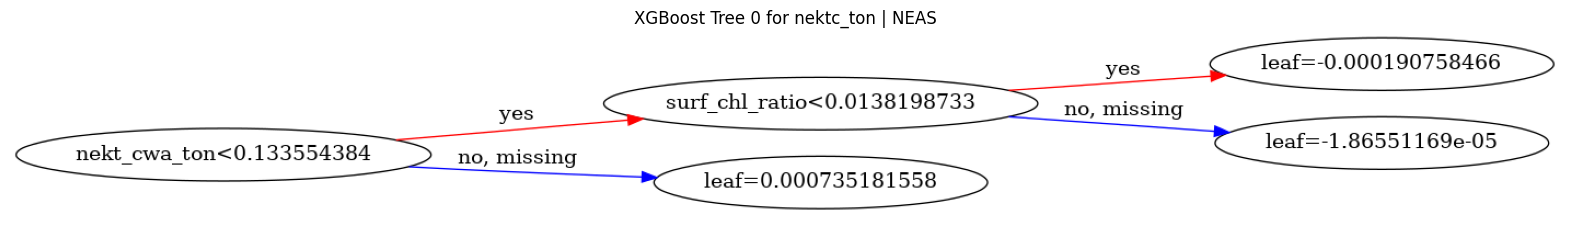

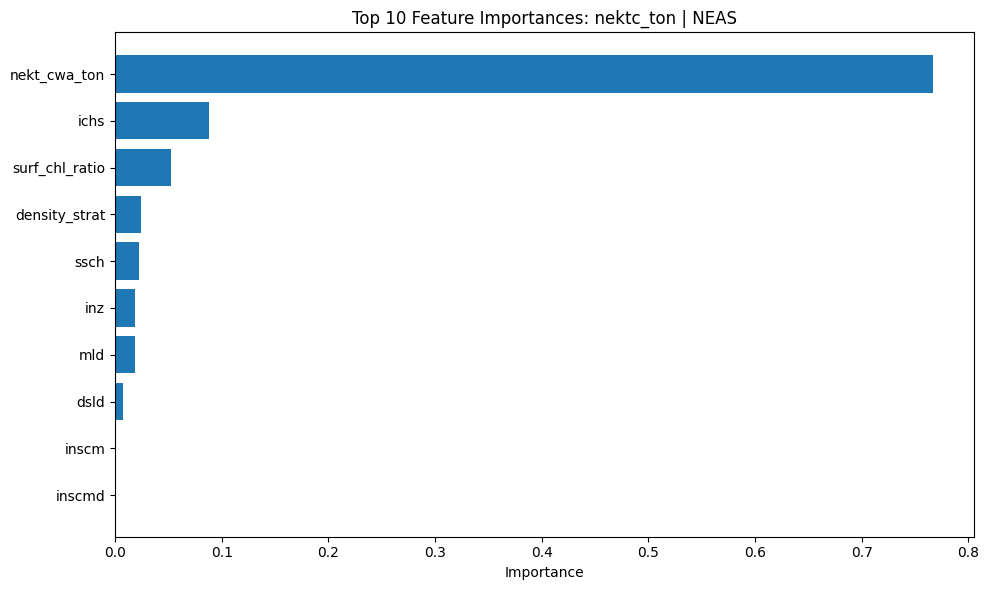

------------------- Predicting nekt_cwa_ton -------------------
Excluded Features for model prediction for target = nekt_cwa_ton :  ['d/n', 'nektb_ton', 'cwafe', 'nektc_ton', 'area']
 
Included Features for model prediction for target = nekt_cwa_ton:  ['ssch', 'ssch5ctd', 'ichs', 'inscm', 'inscmd', 'scmdctd', 'scmch', 'scmden', 'sp', 'sss', 'sst', 'sden', 'mld', 'nektc_ton', 'cwafe', 'nektb_ton', 'chl_depth_ratio', 'density_strat', 'mld_oxycline_diff', 'mld_vs_scm_depth', 'temp_par_ratio', 'chl_x_oxy', 'surf_chl_ratio', 'scm_chl_density']
 
area       target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse status
NEAS nekt_cwa_ton         0.0        0.0     0.999    0.945      0.999     0.945   Good

Best hyperparameters for nekt_cwa_ton | NEAS : 
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}
 
Highly correlated Features : 
['ssch', 'ssch5ctd', 'ichs', 'inscm', 'inscmd', 'scmdctd', '

/home/akashs/.local/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


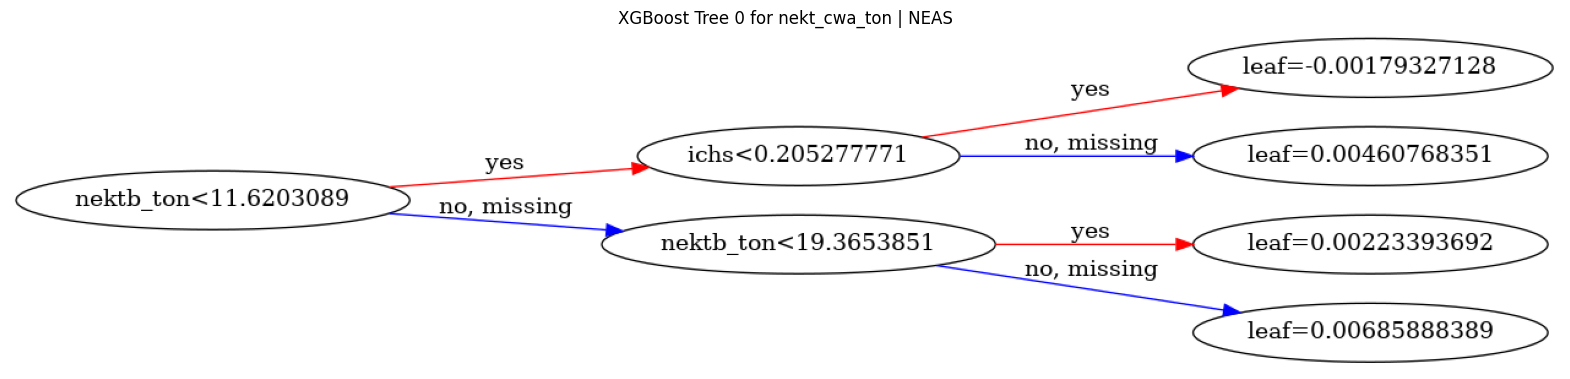

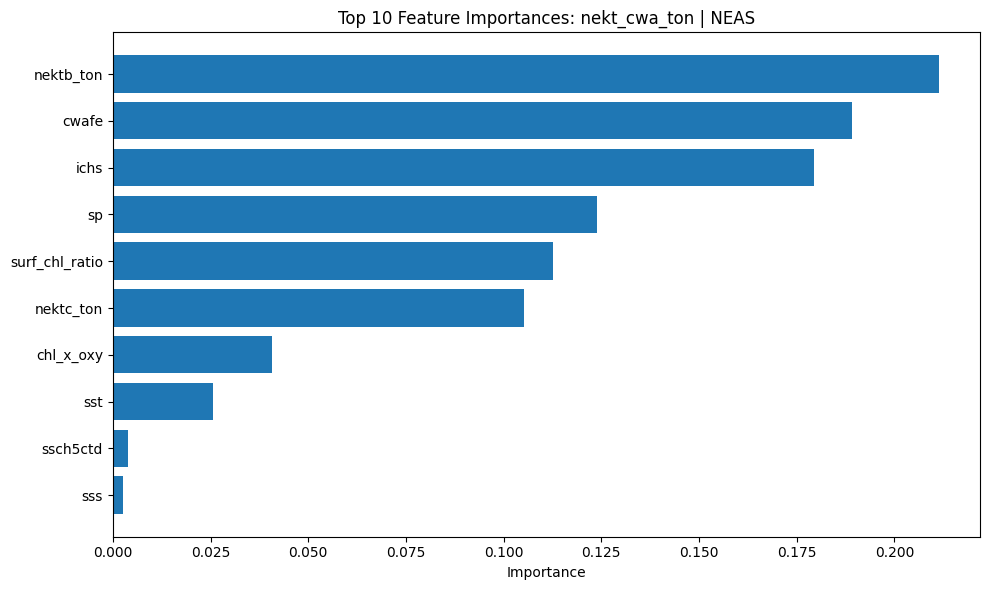

------------------- Predicting cwafe -------------------
Excluded Features for model prediction for target = cwafe :  ['d/n', 'nektb_ton', 'nekt_cwa_ton', 'nektc_ton', 'area']
 
Included Features for model prediction for target = cwafe:  ['ssch', 'ichs', 'inscm', 'inscmd', 'scmch', 'scmden', 'sp', 'sss', 'sst', 'sden', 'mld', 'nektc_ton', 'nekt_cwa_ton', 'nektb_ton', 'chl_depth_ratio', 'density_strat', 'mld_oxycline_diff', 'mld_vs_scm_depth', 'temp_par_ratio', 'chl_x_oxy', 'surf_chl_ratio', 'scm_chl_density']
 
area target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse status
NEAS  cwafe         0.0        0.0     0.999    0.946      0.999     0.946   Good

Best hyperparameters for cwafe | NEAS : 
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}
 
Highly correlated Features : 
['ssch', 'ichs', 'inscm', 'inscmd', 'scmch', 'scmden', 'sp', 'sss', 'sst', 'sden', 'mld', 'nektc_ton', 'nekt_

/home/akashs/.local/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


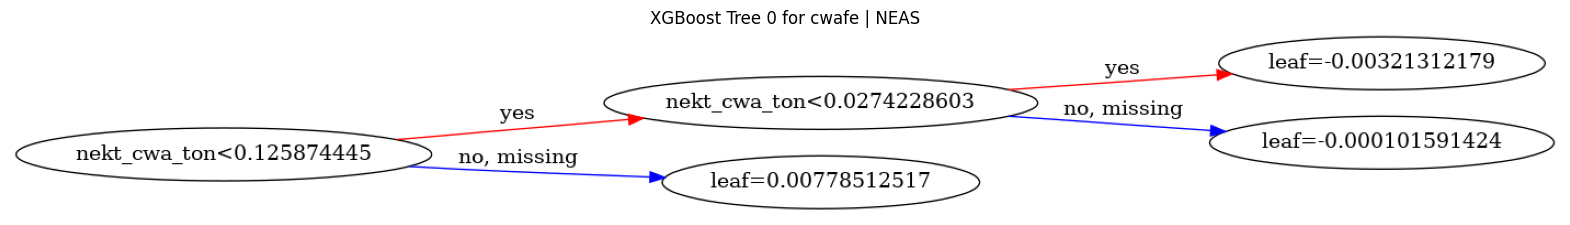

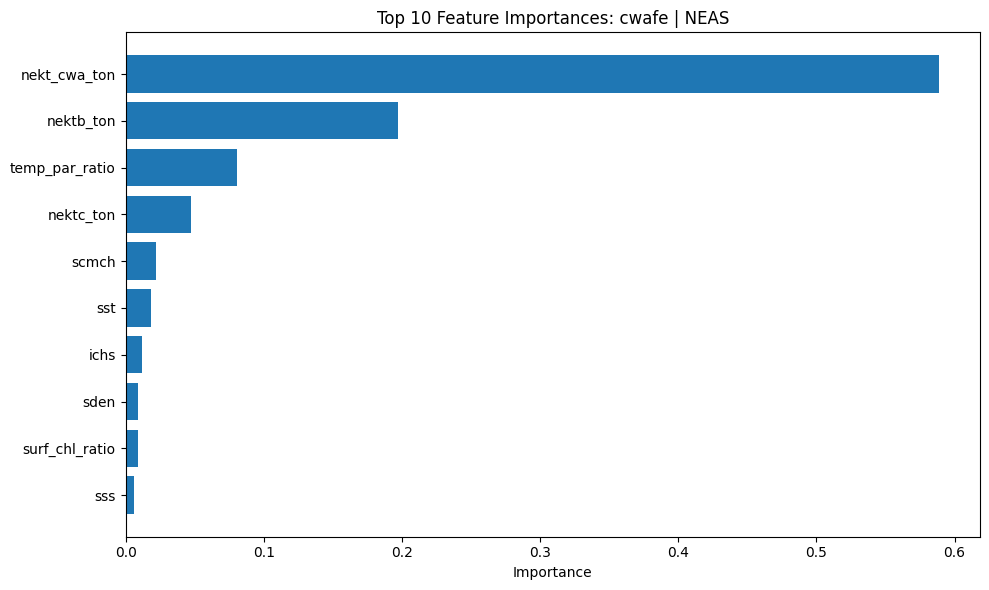

------------------- Predicting nektb_ton -------------------
Excluded Features for model prediction for target = nektb_ton :  ['d/n', 'nekt_cwa_ton', 'cwafe', 'nektc_ton', 'area']
 
Included Features for model prediction for target = nektb_ton:  ['ichs', 'inscm', 'inscmd', 'scmch', 'pscm', 'scmden', 'sp', 'sss', 'sst', 'sden', 'mld', 'std', 'dslt', 'nektc_ton', 'nekt_cwa_ton', 'cwafe', 'chl_depth_ratio', 'density_strat', 'mld_oxycline_diff', 'mld_vs_scm_depth', 'mld_ratio', 'thermo_span_15_20', 'temp_par_ratio', 'chl_x_oxy', 'scm_par_ratio', 'surf_chl_ratio', 'scm_chl_density']
 
area    target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse      status
NEAS nektb_ton        0.18     20.451     0.995    0.676      0.995     0.676 Overfitting

Best hyperparameters for nektb_ton | NEAS : 
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 3, 'subsample': 0.8}
 
Highly correlated Features : 
['ichs', 'inscm',

/home/akashs/.local/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


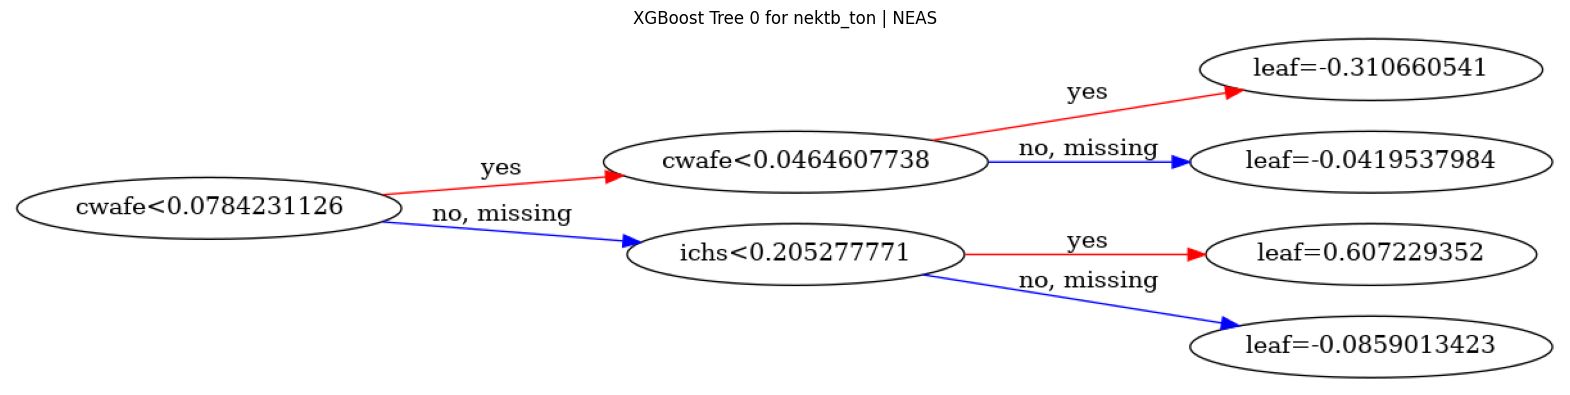

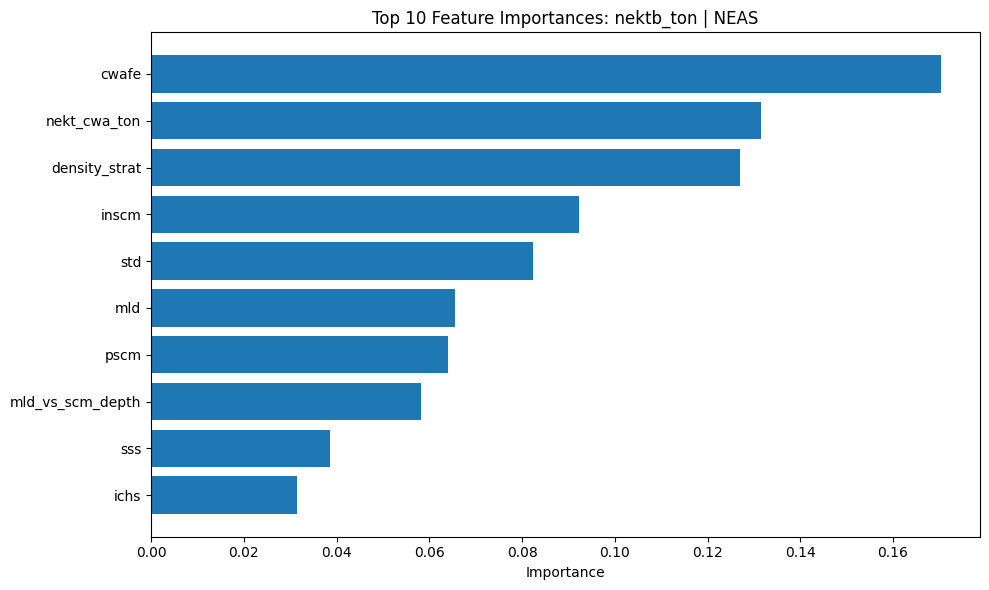


====== All Target Summary ======
area       target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse      status
NEAS    nektc_ton        0.00      0.000     0.996    0.604      0.996     0.604 Overfitting
NEAS nekt_cwa_ton        0.00      0.000     0.999    0.945      0.999     0.945        Good
NEAS        cwafe        0.00      0.000     0.999    0.946      0.999     0.946        Good
NEAS    nektb_ton        0.18     20.451     0.995    0.676      0.995     0.676 Overfitting
CPU times: user 8.02 s, sys: 420 ms, total: 8.44 s
Wall time: 15.8 s


In [22]:
%%time

# exclude = ['area', 'd/n']
# target_cols = ['nektc_ton', 'nekt_cwa_ton', 'cwafe', 'nektb_ton'] #'nekt_cwa_ton'

# for target in target_cols:
#     best_model, best_params, best_rmse, features, importance_feature = tune_xgboost_model(
#         df_neas, target=target, exclude_cols=exclude, target_cols=target_cols, area='NEAS', n_iter=50
#     )

#     # Plot the first tree of the best model
    
#     plot_tree(best_model, num_trees=0, rankdir='LR')
#     fig = plt.gcf()
#     fig.set_size_inches(20, 15)
#     plt.title(f"XGBoost Tree 0 for {target} | NEAS")
#     plt.show()

#     # Plot feature importances
#     plot_feature_importances(importance_feature, target=target, area='NEAS')


# %%time

exclude = ['area', 'd/n']
target_cols = ['nektc_ton', 'nekt_cwa_ton', 'cwafe', 'nektb_ton']
all_metrics = []

for target in target_cols:
    best_model, metrics_df, best_params, features, importance_feature = tune_xgboost_model(
        df_neas, target=target, exclude_cols=exclude, target_cols=target_cols, area='NEAS', n_iter=50
    )

    all_metrics.append(metrics_df)  # <-- collect each result

    # Plot the first tree of the best model
    plot_tree(best_model, num_trees=0, rankdir='LR')
    fig = plt.gcf()
    fig.set_size_inches(20, 15)
    plt.title(f"XGBoost Tree 0 for {target} | NEAS")
    plt.show()

    # Plot feature importances
    plot_feature_importances(importance_feature, target=target, area='NEAS')

final_metrics_df = pd.concat(all_metrics, ignore_index=True)
print("\n====== All Target Summary ======")
print(final_metrics_df.to_string(index=False))


------------------- Predicting nektc_ton -------------------
Excluded Features for model prediction for target = nektc_ton :  ['d/n', 'nektb_ton', 'nekt_cwa_ton', 'cwafe', 'area']
 
Included Features for model prediction for target = nektc_ton:  ['ssch', 'ichs', 'scmdctd', 'scmden', 'sp', 'oxy', 'omzb', 'bt_15', 'bt_20', 'dsld', 'dsldo', 'dslt', 'nektb_ton', 'do_gradient', 'omz_thickness', 'mld_oxycline_diff', 'mld_ratio', 'thermo_span_15_20', 'temp_par_ratio', 'chl_x_oxy', 'surf_chl_ratio']
 
area    target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse      status
SEAS nektc_ton         0.0        0.0     0.933     0.13      0.933      0.13 Overfitting

Best hyperparameters for nektc_ton | SEAS : 
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
 
Highly correlated Features : 
['ssch', 'ichs', 'scmdctd', 'scmden', 'sp', 'oxy', 'omzb', 'bt_15', 'bt_20', 'dsld', 'dsldo', 'dslt', 'nek

/home/akashs/.local/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


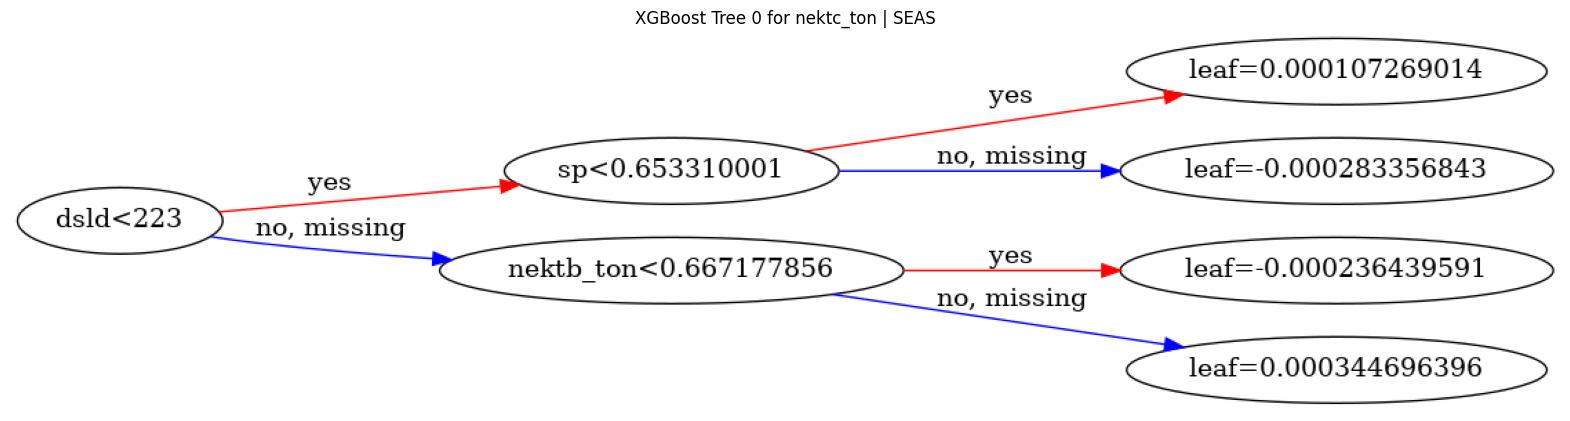

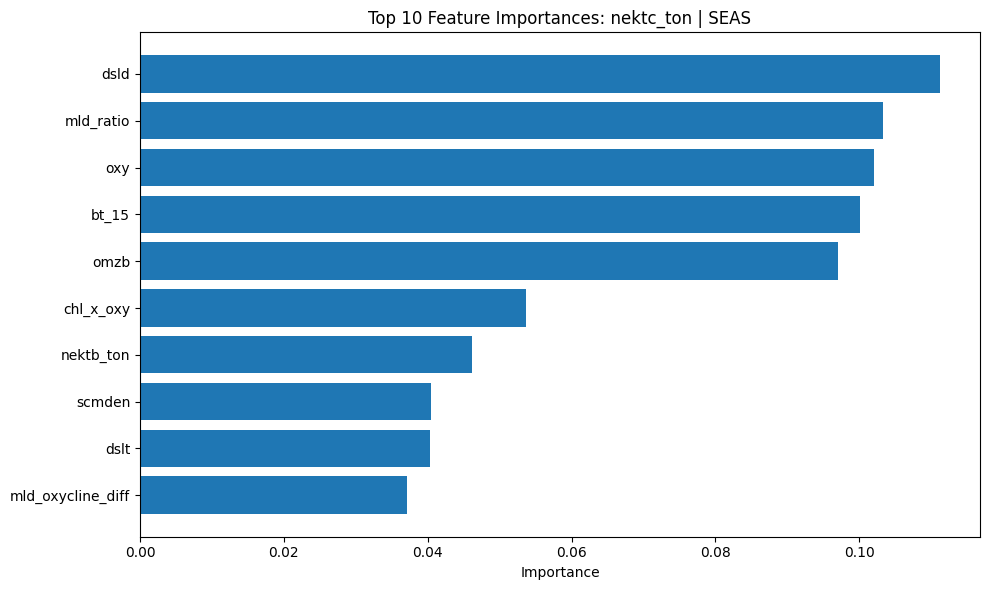

------------------- Predicting nekt_cwa_ton -------------------
Excluded Features for model prediction for target = nekt_cwa_ton :  ['d/n', 'nektb_ton', 'cwafe', 'nektc_ton', 'area']
 
Included Features for model prediction for target = nekt_cwa_ton:  ['ichs', 'inscmd', 'inz', 'pscm', 'sst', 'sden', 'mld', 'omzt', 'omzb', 'dsld', 'dslt', 'd/n', 'cwafe', 'nektb_ton', 'density_strat', 'omz_thickness', 'mld_vs_scm_depth', 'mld_ratio', 'thermo_span_15_20']
 
area       target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse status
SEAS nekt_cwa_ton         0.0        0.0     0.972    0.885      0.972     0.885   Good

Best hyperparameters for nekt_cwa_ton | SEAS : 
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 3, 'subsample': 1.0}
 
Highly correlated Features : 
['ichs', 'inscmd', 'inz', 'pscm', 'sst', 'sden', 'mld', 'omzt', 'omzb', 'dsld', 'dslt', 'd/n', 'cwafe', 'nektb_ton', 'density_strat', 'omz_thickness'

/home/akashs/.local/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


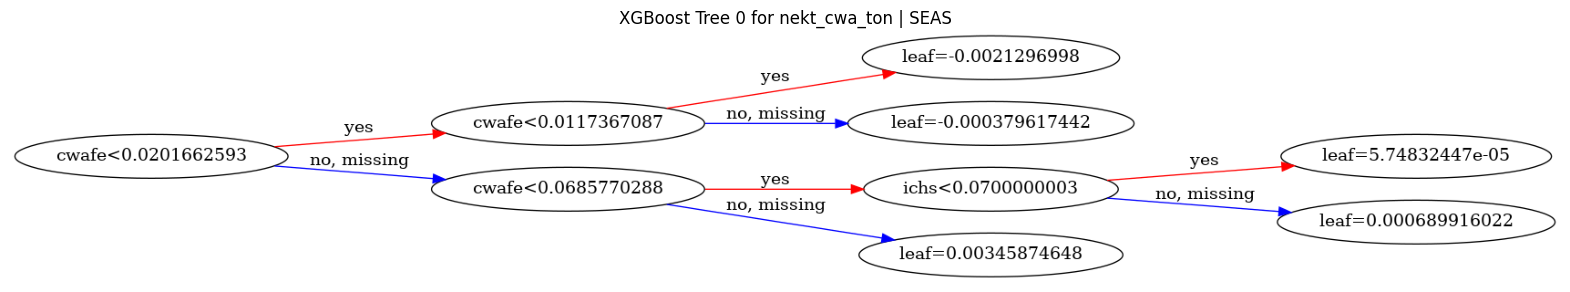

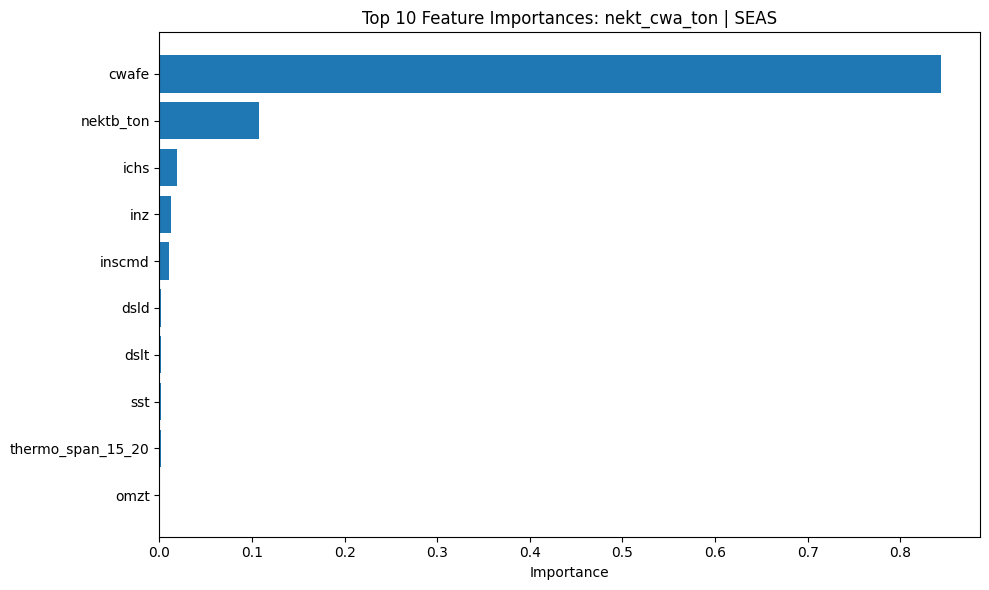

------------------- Predicting cwafe -------------------
Excluded Features for model prediction for target = cwafe :  ['d/n', 'nektb_ton', 'nekt_cwa_ton', 'nektc_ton', 'area']
 
Included Features for model prediction for target = cwafe:  ['ichs', 'inscmd', 'inz', 'scmch', 'pscm', 'sst', 'sden', 'sdo', 'mld', 'oxy', 'omzb', 'bt_15', 'bt_20', 'dsld', 'dslt', 'd/n', 'nekt_cwa_ton', 'nektb_ton', 'do_gradient', 'density_strat', 'omz_thickness', 'mld_vs_scm_depth', 'mld_ratio', 'thermo_span_15_20', 'chl_x_oxy', 'scm_chl_density']
 
area target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse status
SEAS  cwafe         0.0        0.0     0.999     0.95      0.999      0.95   Good

Best hyperparameters for cwafe | SEAS : 
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}
 
Highly correlated Features : 
['ichs', 'inscmd', 'inz', 'scmch', 'pscm', 'sst', 'sden', 'sdo', 'mld', 'oxy', 'omzb', 'bt_15',

/home/akashs/.local/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


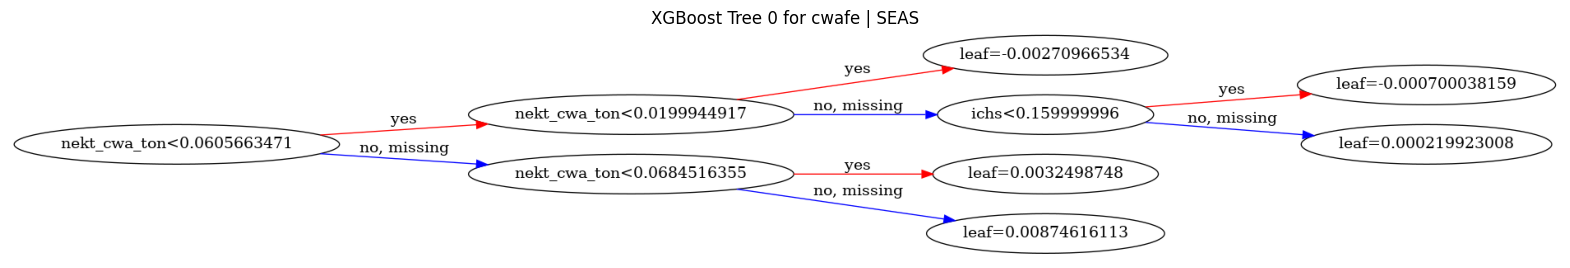

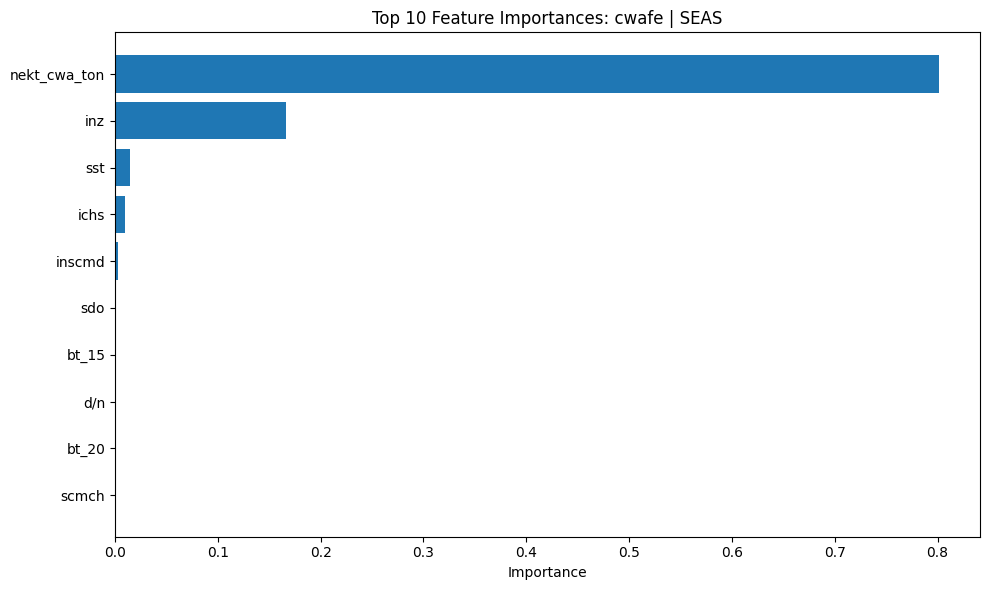

------------------- Predicting nektb_ton -------------------
Excluded Features for model prediction for target = nektb_ton :  ['d/n', 'nekt_cwa_ton', 'cwafe', 'nektc_ton', 'area']
 
Included Features for model prediction for target = nektb_ton:  ['ssch', 'ichs', 'inz', 'scmch', 'sdo', 'mld', 'oxy', 'omzb', 'bt_20', 'nektc_ton', 'nekt_cwa_ton', 'cwafe', 'chl_grad_surf_sub', 'do_gradient', 'omz_thickness', 'mld_vs_scm_depth', 'mld_ratio', 'thermo_span_15_20', 'chl_x_oxy', 'scm_par_ratio', 'surf_chl_ratio', 'scm_chl_density']
 
area    target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse status
SEAS nektb_ton       5.302     10.232     0.865    0.749      0.865     0.749   Good

Best hyperparameters for nektb_ton | SEAS : 
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 3, 'subsample': 0.8}
 
Highly correlated Features : 
['ssch', 'ichs', 'inz', 'scmch', 'sdo', 'mld', 'oxy', 'omzb', 'bt_20', 'nektc_ton', '

/home/akashs/.local/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


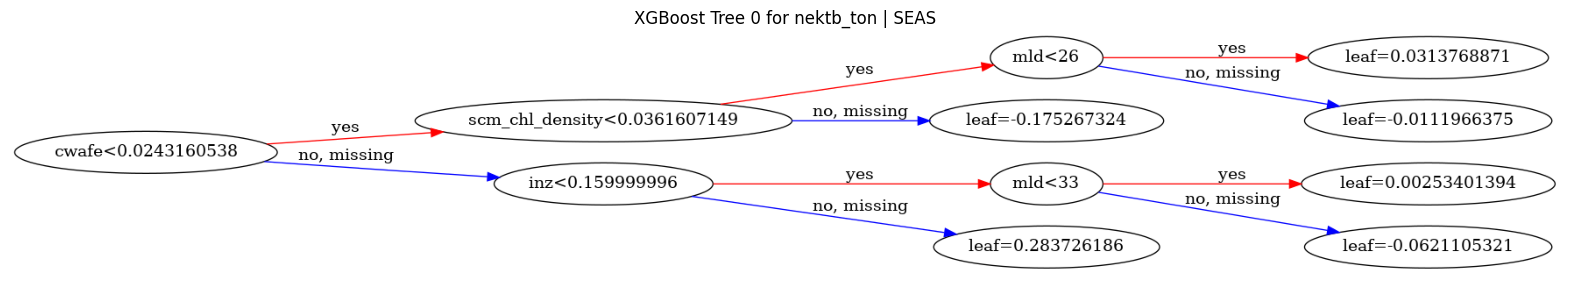

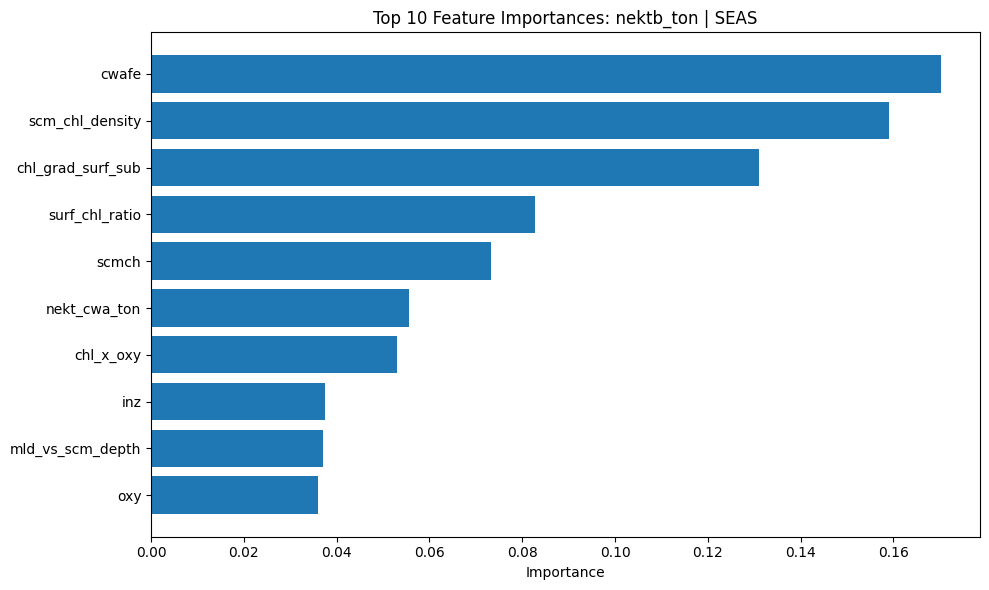


====== All Target Summary | SEAS ======
area       target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse      status
SEAS    nektc_ton       0.000      0.000     0.933    0.130      0.933     0.130 Overfitting
SEAS nekt_cwa_ton       0.000      0.000     0.972    0.885      0.972     0.885        Good
SEAS        cwafe       0.000      0.000     0.999    0.950      0.999     0.950        Good
SEAS    nektb_ton       5.302     10.232     0.865    0.749      0.865     0.749        Good
CPU times: user 8.21 s, sys: 201 ms, total: 8.41 s
Wall time: 12 s


In [23]:
%%time

# exclude = ['area', 'd/n']
# target_cols = ['nektc_ton', 'nekt_cwa_ton', 'cwafe', 'nektb_ton'] #'nekt_cwa_ton'


# for target in target_cols:
#     best_model, best_params, best_rmse, features, importance_feature = tune_xgboost_model(
#         df_seas, target=target, exclude_cols=exclude, target_cols=target_cols, area='SEAS', n_iter=50
#     )
    
    
#     # Plot the first tree of the best model
    
#     plot_tree(best_model, num_trees=0, rankdir='LR')
#     fig = plt.gcf()
#     fig.set_size_inches(20, 15)
#     plt.title(f"XGBoost Tree 0 for {target} | SEAS")
#     plt.show()

#     # Plot feature importances
#     plot_feature_importances(importance_feature, target=target, area='SEAS')

# %%time

exclude = ['area', 'd/n']
target_cols = ['nektc_ton', 'nekt_cwa_ton', 'cwafe', 'nektb_ton']

all_metrics_seas = []

for target in target_cols:
    best_model, metrics_df, best_params, features, importance_feature = tune_xgboost_model(
        df_seas, target=target, exclude_cols=exclude, target_cols=target_cols, area='SEAS', n_iter=50
    )
    
    all_metrics_seas.append(metrics_df)  # Collect each result

    # Plot the first tree of the best model
    plot_tree(best_model, num_trees=0, rankdir='LR')
    fig = plt.gcf()
    fig.set_size_inches(20, 15)
    plt.title(f"XGBoost Tree 0 for {target} | SEAS")
    plt.show()

    # Plot feature importances
    plot_feature_importances(importance_feature, target=target, area='SEAS')

# Final combined output
final_metrics_seas = pd.concat(all_metrics_seas, ignore_index=True)
print("\n====== All Target Summary | SEAS ======")
print(final_metrics_seas.to_string(index=False))


# END OF CODE